<a href="https://colab.research.google.com/github/IoT-master/PyTorchMLTemplates/blob/master/Linear_Regression_with_a_Simple_Line_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

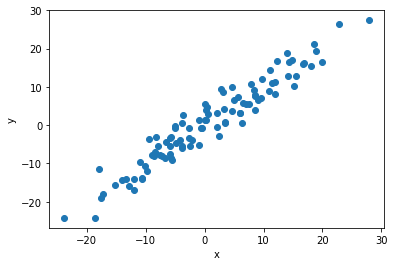

In [3]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3
# plt.axis([min(X), max(X), min(y), max(y)])
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size) 
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
def get_params():
  return (w[0][0].item(), b[0].item())

0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title(title)
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1+b1
  plt.plot(x1,y1, 'r')
  plt.scatter(X, y)
  plt.show()

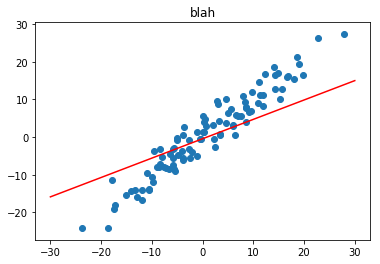

In [8]:
plot_fit('blah')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 35.1236686706543
epoch: 1 loss: 25.107995986938477
epoch: 2 loss: 18.98021125793457
epoch: 3 loss: 15.230956077575684
epoch: 4 loss: 12.93682861328125
epoch: 5 loss: 11.532917022705078
epoch: 6 loss: 10.673620223999023
epoch: 7 loss: 10.14750862121582
epoch: 8 loss: 9.825231552124023
epoch: 9 loss: 9.627660751342773
epoch: 10 loss: 9.50638198852539
epoch: 11 loss: 9.431777954101562
epoch: 12 loss: 9.38573169708252
epoch: 13 loss: 9.357156753540039
epoch: 14 loss: 9.339273452758789
epoch: 15 loss: 9.327930450439453
epoch: 16 loss: 9.320592880249023
epoch: 17 loss: 9.315705299377441
epoch: 18 loss: 9.312318801879883
epoch: 19 loss: 9.309852600097656
epoch: 20 loss: 9.307950019836426
epoch: 21 loss: 9.306394577026367
epoch: 22 loss: 9.305052757263184
epoch: 23 loss: 9.30384349822998
epoch: 24 loss: 9.302716255187988
epoch: 25 loss: 9.301641464233398
epoch: 26 loss: 9.300600051879883
epoch: 27 loss: 9.299579620361328
epoch: 28 loss: 9.298575401306152
epoch: 29 loss: 9.297580

Text(0.5, 0, 'epoch')

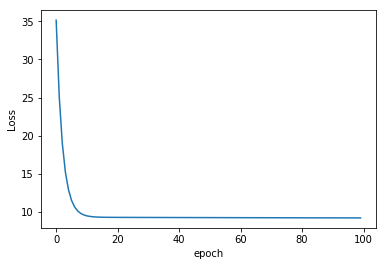

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

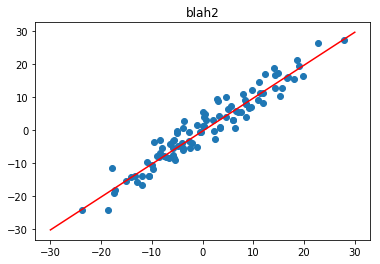

In [12]:
#@title
plot_fit("blah2")

In [13]:
print(get_params())

(1.001164436340332, -0.3423668146133423)
